## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 33 columns):
DAMAGE_PROPERTY       8230 non-null float64
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 1 columns):
DAMAGE_PROPERTY    8230 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 32 columns):
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_PROP     8230 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.7085
 0.5805
 0.7085
   ⋮    
 0.9397
 0.9644
 0.7085
[torch.DoubleTensor of size 8230x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.DoubleTensor of size 8230x32]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.FloatTensor of size 8230x32]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

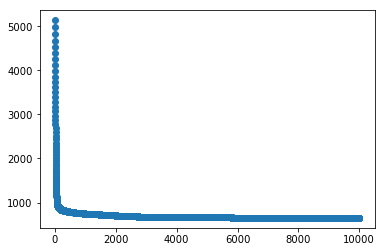

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8230)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

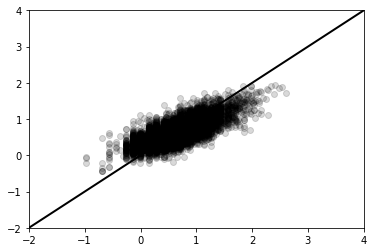

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 284.0173
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2748)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

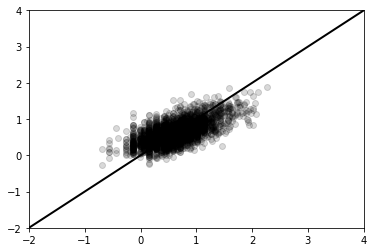

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [23]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [24]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [25]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 279.1804
[torch.FloatTensor of size 1]

In [26]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2699)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.41747 + 7.67485


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

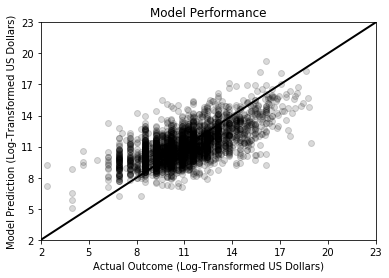

In [28]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [29]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1077  0.3530 -0.1551 -0.2349 -0.1061 -0.0298  0.1380  0.0597 -0.0995  0.0314
 0.0540 -0.6109 -0.0814  0.4877  0.0506  0.0492  0.1484 -0.0910  0.2156 -0.2129
-0.3007  0.4163  0.2191  0.0899  0.1765 -0.5042 -0.3257 -0.1160 -0.5895  0.0494
 0.4027 -0.0601 -0.0222  0.1362  0.7312  0.1475  0.1849  0.1076  0.0871  0.4390
-0.1024  0.2831 -0.2989  0.1305  0.0209 -0.1440  0.0140  0.1541 -0.1458 -0.3111
 0.1130 -0.4463  0.0409  0.2190  0.1723 -0.0783  0.1713  0.0716  0.2307 -0.1107
-0.1720 -0.1193 -0.0367 -0.1288  0.2526  0.4774  0.1816  0.2742  0.2297  0.4304
-0.0937  0.2797  0.1748  0.2442  0.1223 -0.1230  0.1284 -0.1274 -0.2954 -0.0997
-0.4002 -0.2374  0.0852 -0.0180  0.1156  0.2474 -0.2035 -0.0648  0.5661  0.6121
 0.1076 -0.2276 -0.3765 -0.2554 -0.1735  0.3422  0.2682  0.3986  0.0883 -0.0943
 0.1046  0.1557  0.0190  0.1782  0.0379 -0.1938  0.0834  0.1769 -0.3199  0.2774
 0.1074 -0.7595  0.1537 -0.3921 -0.4514 -0.0270  0.0282  0.1855  0.3582 -0.0906
 

In [30]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3386  0.1820 -0.2858  0.2462 -0.3796 -0.3357 -0.2906  0.2548  0.1716  0.2236

Columns 10 to 19 
-0.3522  0.2625  0.2139  0.2914  0.3214  0.3056  0.2273 -0.3845 -0.2879  0.2598

Columns 20 to 20 
 0.1594
[torch.FloatTensor of size 1x21]

## Round 2: Two-Hidden-Layer Neural Network

In [31]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [32]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 1))

In [33]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

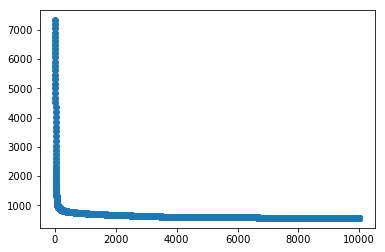

In [34]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [35]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

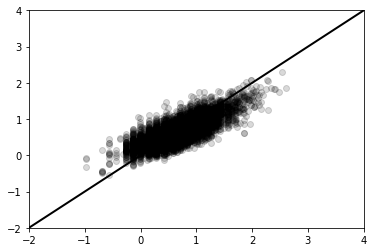

In [36]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [37]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 315.7537
[torch.FloatTensor of size 1]

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

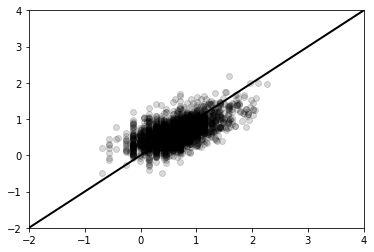

In [39]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [40]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 306.4855
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

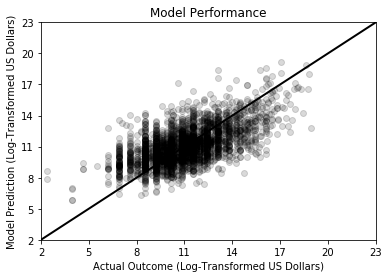

In [42]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [43]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0837 -0.0116 -0.6639 -0.0524 -0.0108 -0.4699  0.3644 -0.3307 -0.1838 -0.1988
-0.0517  0.1889 -0.2788 -0.3369  0.3036  0.0833 -0.1330 -0.1310  0.5733  0.4245
-0.0518 -0.2999 -0.0454  0.2752 -0.0338 -0.1803  0.0883 -0.0788 -0.0486 -0.3599
 0.2513  0.1393 -0.0003  0.3541  0.2175 -0.2300  0.3177  0.0656 -0.5690  0.3299
 0.4665  0.1385  0.0029  0.2054  0.0388  0.0030  0.1164  0.2469 -0.1090 -0.0947
-0.2503 -0.1084  0.1468  0.0840 -0.0808 -0.0983  0.1178  0.1233  0.1839 -0.2637
-0.2804  0.1279  0.1249  0.4374  0.0119 -0.0297 -0.0760 -0.0012 -0.1296 -0.1111
 0.1052 -0.4527 -0.1956 -0.9286  0.3769 -0.2775 -0.1014 -0.6783  0.0398  0.3153
-0.2094  0.1242 -0.2019 -0.0993 -0.0015  0.0714  0.1479 -0.2089 -0.1603 -0.4117
 0.0574  0.3122  0.2103 -0.2590 -0.4859  0.1525 -0.0238 -0.1554  0.0978  0.2335
-0.3121 -0.0046  0.1549  0.2789  0.0781  0.1103  0.0898 -0.0516 -0.6020  0.4823
-0.0544 -0.0863 -1.0818 -0.6255 -1.0141  0.5723  0.0381  0.4705 -0.1777 -0.2139
 

In [44]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2385 -0.3423 -0.1472 -0.2837  0.1672 -0.0627  0.2395  0.3811 -0.4506 -0.0871
 0.5727  0.2642  0.0824 -0.1447 -0.0677 -0.5780  0.2706 -0.3274  0.3050 -0.0175
 0.3072  0.0208  0.1729  0.2660 -0.1109 -0.1542  0.0901 -0.4136  0.1103  0.1892
-0.0846  0.1056 -0.3970  0.2218 -0.0305  0.1048  0.2986 -0.0937  0.5474 -0.2788
 0.0194  0.4643  0.1799  0.0832 -0.2035  0.1175  0.0511 -0.1155  0.2097  0.1411
-0.2852  0.2181 -0.4405 -0.4694 -0.2892  0.1358 -0.0227  0.3727 -0.2554  0.3285
-0.0020 -0.0651  0.0013  0.0901  0.1379 -0.1138 -0.4105 -0.1269 -0.0044 -0.1611
-0.4065  0.1208 -0.2959 -0.1541  0.1957 -0.0132  0.0369  0.1939 -0.1391  0.5381
-0.2873  0.0908  0.0281  0.3318 -0.0196  0.5501  0.1998  0.0074 -0.3617  0.1529
-0.0303 -0.1890 -0.1707 -0.0276  0.2934 -0.4988 -0.2683  0.0110 -0.1069 -0.4955
 0.0704 -0.0565  0.3713 -0.2666  0.0851 -0.1662 -0.1567  0.1432 -0.2343  0.1436
 0.1615 -0.1444  0.0874 -0.3215  0.2952 -0.1575 -0.0499  0.0127 -0.1650  0.0077
-

In [45]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2604 -0.4504  0.5407  0.6306  0.4286 -0.6611  0.3934  0.4003  0.5466 -0.6923

Columns 10 to 13 
 0.4525  0.4463  0.3400 -0.6395
[torch.FloatTensor of size 1x14]

## Round 3: Three-Hidden-Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

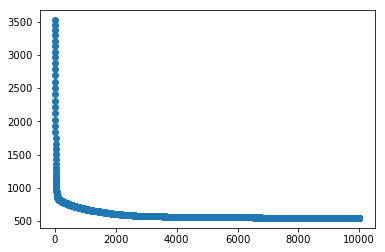

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

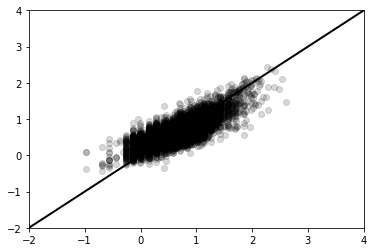

In [51]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [52]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 315.8363
[torch.FloatTensor of size 1]

In [53]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

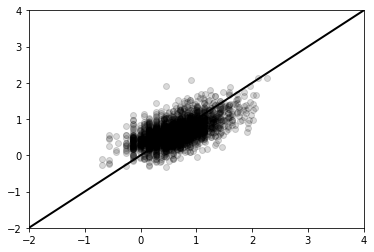

In [54]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [55]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 319.7798
[torch.FloatTensor of size 1]

In [56]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

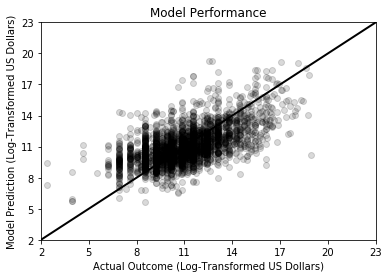

In [57]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [58]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0601  0.3143  0.1544  0.1487  0.1812 -0.0497  0.2390 -0.2106 -0.0520 -0.2133
 0.1024 -0.2564  0.0689 -0.1835  0.0039 -0.0242  0.0235  0.3689 -0.0424 -0.1427
-0.0819  0.3002 -0.0669 -0.0453  0.3535  0.0831  0.0636  0.2926 -0.3022 -0.1503
-0.0254 -0.0411  0.1730 -0.0189  0.0682  0.0861 -0.1800  0.1331 -0.0666  0.1798
 0.1016  0.2940  0.1490  0.2978  0.1983  0.1901  0.1747  0.1483  0.0456  0.0078
-0.0372  0.0825  0.0544  0.1090  0.1437 -0.0728  0.0107 -0.1355  0.1924  0.1623
-0.0493  0.1947 -0.0319 -0.1122  0.1088 -0.0908  0.2510 -0.0057 -0.1239 -0.0864
-0.1602  0.1999 -0.1204  0.0668 -0.1893  0.1912 -0.0017 -0.0954 -0.1908 -0.1604
-0.0969  0.1176  0.0536 -0.0753 -0.2973 -0.1052 -0.2207  0.0600 -0.2404  0.1779
 0.0031  0.3229  0.3487  0.0299  0.2458 -0.2526  0.0654  0.3145  0.3614 -0.2451
 0.0213  0.4882 -0.0679  0.0969  0.0715  0.0033 -0.1242  0.2411  0.1703 -0.0165
 0.1516 -0.0716  0.0054  0.0187  0.2149  0.1571 -0.2545  0.1934 -0.1407  0.4693
 

In [59]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2183 -0.0612 -0.0970 -0.3568 -0.0961 -0.1490 -0.0175  0.2256  0.3188 -0.4632
-0.0441 -0.0560  0.4129  0.1365  0.6001  0.0987 -0.1327  0.0116 -0.1045  0.2101
 0.1254  0.2461  0.0107 -0.2192  0.1474  0.1649 -0.1714 -0.5460  0.1671 -0.2675
 0.0348  0.2391 -0.2471 -0.0329  0.0826  0.0310 -0.0678 -0.3425 -0.1294  0.2946
-0.3131  0.0092 -0.8102 -0.0680  0.2068 -0.1206  0.0327  0.1941 -0.3711 -0.3436
-0.0254  0.1403 -0.0500 -0.1714 -0.0222 -0.0697  0.0230 -0.0462 -0.0820 -0.1431
 0.0933 -0.2155 -0.3682  0.1240  0.0841 -0.0806  0.0006 -0.2000 -0.1198 -0.0324
 0.1096  0.1428  0.1342 -0.0402  0.1537  0.1410 -0.0322 -0.1513 -0.0234 -0.0498
-0.1162 -0.1910  0.1094  0.3772 -0.0566  0.1643 -0.0956  0.0919 -0.1531  0.2736
 0.3844  0.2341 -0.2926 -0.1854 -0.0767  0.4193 -1.6598  0.1715  0.0004  0.7470
 0.1759  0.3045 -0.2114 -0.1359  0.0012  0.2572 -0.2513 -0.0756 -0.1504  0.3863
-0.1577  0.1629 -0.2499  0.0045  0.1626  0.0980 -0.0561  0.0112 -0.0784  0.2065
 

In [60]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1219 -0.0932  0.0679 -0.1459 -0.1706 -0.0944  0.3819  0.2246  0.0415 -0.5181
-0.2636 -1.1727  0.2112 -0.3209  1.1921  0.1895  0.1820  0.3895  0.2733  0.2143
-0.6389 -0.0209  0.1422  0.4067  0.4884  0.2500  0.3410  0.2382  0.1108  0.5025
 0.3774  0.4534 -0.0890 -0.1572  0.2808  0.4483  0.4438 -0.5966 -0.0225  0.2617
 0.5035  0.3517 -0.1285 -0.2267  0.4761  0.2552  0.4261  0.2448 -0.0465 -0.3179
 0.2183  0.0646 -0.1671 -0.6353  0.2615 -0.4668 -0.0363 -0.0587 -0.3105 -4.0709
 0.0347  0.0443  0.0809 -0.1052  0.1489 -0.4616  0.3191 -0.0695  0.1999 -0.4700
 0.1191  0.0221  0.2914 -0.1067  0.4538  0.1881 -0.0256  0.0637 -0.0568 -0.0095
 0.1921  0.0761  0.3185  0.0017  0.5448 -0.1687 -0.2283  0.3571 -0.0752 -0.2735

Columns 10 to 13 
 0.3186  0.1785  0.0895 -0.6331
 0.0926  0.3204  0.3925 -5.8943
-0.0699  0.1411  0.8249 -0.3961
-0.0318  0.1987 -0.1554  0.4142
 0.1775 -0.1471 -0.4285 -0.5584
 0.4726  0.0337 -0.4955 -0.1414
 0.4457  0.0857 -0.1721 -0.369

In [61]:
model[(6)].weight

Parameter containing:
 0.3344  1.1657  0.7526  0.3495  0.2524 -2.4275  0.4131  0.1274  0.5199
[torch.FloatTensor of size 1x9]

## Round 4: Four-Hidden-Layer Neural Network

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

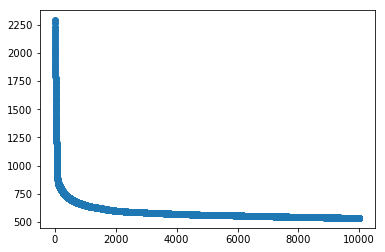

In [65]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

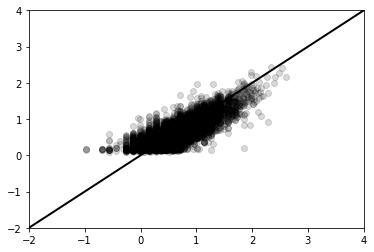

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 330.1873
[torch.FloatTensor of size 1]

In [69]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

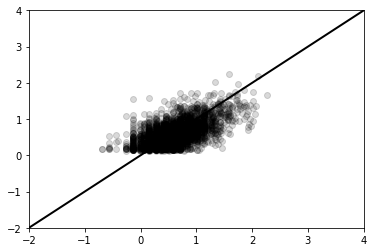

In [70]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [71]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 320.8619
[torch.FloatTensor of size 1]

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

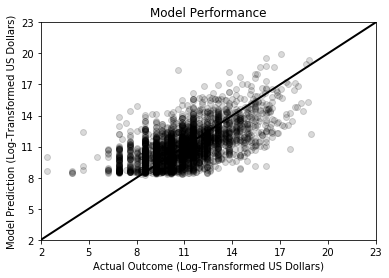

In [73]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [74]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0480 -0.1816  0.0625  0.1133 -0.0023 -0.1584  0.0762 -0.2617 -0.1496  0.1109
-0.1752  0.1339  0.0764  0.1083  0.1263  0.1070  0.2291 -0.0619  0.1382  0.0255
-0.1361  0.1741 -0.1280 -0.3521 -0.2604 -0.1130  0.0055  0.1762 -0.4870 -0.2778
-0.3114  0.0311  0.4601  0.1749  0.2484  0.0394 -0.0298  0.0826  0.0444 -0.2096
-0.0206  0.2771  0.0837  0.0287  0.0878 -0.2056 -0.1354  0.2130  0.1002  0.1859
 0.0154 -0.4555 -0.0979  0.0115  0.0845  0.3564  0.1700  0.2265  0.1067  0.0140
 0.0904  0.3092  0.1847 -0.0023 -0.0660  0.3222  0.0141 -0.0644  0.1067 -0.3858
 0.2349 -0.3761 -0.1331 -0.1736  0.0633 -0.0096  0.1084  0.1140 -0.2084  0.0554
 0.0216 -0.0786  0.1066 -0.2189  0.1677 -0.2963 -0.2976  0.1255 -0.1349 -0.1415
 0.0594  0.2465 -0.1957 -0.0133  0.0923  0.2433 -0.0991  0.2469  0.0336 -0.1239
 0.1527  0.1965 -0.0474  0.1589  0.1516 -0.0752 -0.0703  0.0286 -0.5365 -0.2281
 0.0334 -0.3285  0.1056 -0.0303 -0.1089  0.1390  0.1264  0.2152 -0.2986  0.3634
-

In [75]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0927  0.0400  0.0404  0.5443 -0.2390  0.2452 -0.2232  0.0567 -0.2769  0.1767
-0.2203  0.2041  0.0774  0.0266  0.3466  0.3240 -0.0075  0.3626 -0.3283 -0.0099
-0.3573  0.0948  0.1104  0.2189 -0.0280  0.1545 -0.4402  0.1276  0.1001  0.1441
 0.0411  0.0192  0.5006  0.0621  0.2870  0.0796  0.0116  0.1357 -0.3049 -0.2284
 0.1365 -0.1578  0.6850 -0.1907  0.6376  0.4474 -0.1261 -0.0852 -0.6730 -0.6809
 0.0072  0.1186  0.1787  0.0460  0.1778 -0.0152  0.0804  0.2549 -0.1162  0.0915
-0.2156  0.1935 -0.0176  0.1196  0.1879  0.3010  0.2050  0.1625 -0.2105 -0.1090
 0.1285  0.2027 -0.2253  0.2072 -0.2468 -0.5273  0.1836 -0.1381  0.1541 -0.0193
-0.2455 -0.2626  0.1648  0.3963  0.1715  0.1669 -0.0642 -0.2747 -0.0223  0.1912
-0.0878  0.2048 -0.4088  0.2115  0.0410  0.2398  0.0316  0.3756 -0.1263  0.0691
 0.1155  0.0549 -0.1236 -0.1373 -0.0106  0.0530 -0.0550  0.3655  0.3653 -0.2518
-0.4309 -0.3641  0.4310  0.3768  0.0497 -0.0471 -0.1073 -0.1592 -0.0532  0.1960
 

In [76]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.9363 -0.3359  0.3650  0.3241  0.3425 -0.0247  0.2935  0.1935 -0.7396  1.0378
-0.0866  0.0461 -0.0636  0.0574 -7.3883 -0.1243 -0.2886  0.0051 -0.1801  0.2453
-0.1279  0.4063 -0.2348  0.0710 -0.0354  0.4386 -0.3828  0.1683  0.0557  0.2858
 0.6424  0.3568 -0.8784 -0.0687 -0.3545  0.6028 -0.3112  0.3616 -0.2157  0.4054
 0.3142 -0.1454  0.1485  0.0266 -4.6604  0.2338  0.7163  0.2392  0.0659 -0.4385
 0.0949  0.2995 -0.2700  0.2059 -0.4771 -0.0305 -0.2148 -0.2849  0.0550  0.2723
-0.2897 -0.2339  0.3972  0.3245  0.3725 -0.0144  0.1658 -0.2585  0.0994  0.4312
-0.0824  0.1182  0.2477 -0.4158  0.7497 -0.1353  0.6015 -0.8682 -0.3413  0.3163
-0.0317 -0.0969 -0.0438 -0.0783 -0.1456  0.1256  0.1192  0.0912 -0.1050 -0.0589

Columns 10 to 13 
-0.5788  0.8054 -1.2393  0.2426
-0.2235  0.1722  0.1027  0.1963
 0.2121 -0.3092  0.1801  0.5714
-0.1161  0.2622  0.2517  0.0812
 0.2781 -0.1349 -0.0620 -0.1111
-0.3013 -0.2840 -0.4033  0.1173
 0.2395 -0.1686  0.0970 -0.367

In [77]:
model[(6)].weight

Parameter containing:
-0.1002  1.0613  0.6428 -1.4636 -0.2995 -0.2267  0.1334 -0.2928 -0.1516
-0.3359  2.6135  0.6913 -0.2014  1.5356  0.7024  0.6192 -0.4027  0.1131
-4.7977  0.2918  0.1966  0.0365 -0.1015  0.0204  0.1532 -0.1022 -0.0690
-0.2402  1.5111  0.3438 -0.0567  0.4759  0.3414  0.3737 -0.3540 -0.2003
 0.5565  0.2668  0.2453  0.1881 -0.4914  0.1587  0.7263  0.2294  0.2332
 0.4580 -1.0749 -0.2833 -0.6499  0.2072  0.5902  0.3740  0.2279 -0.0095
[torch.FloatTensor of size 6x9]

In [78]:
model[(8)].weight

Parameter containing:
-0.7274  0.8452  1.7918  0.5161  0.3192 -0.5483
[torch.FloatTensor of size 1x6]

## Round 5: Five-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

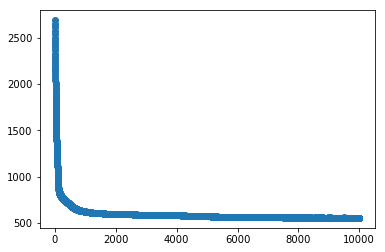

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

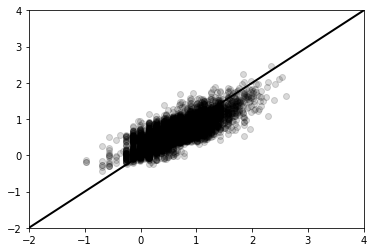

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 325.9309
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

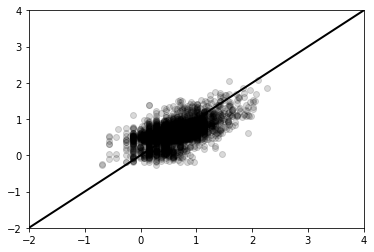

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [88]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 333.0652
[torch.FloatTensor of size 1]

In [89]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

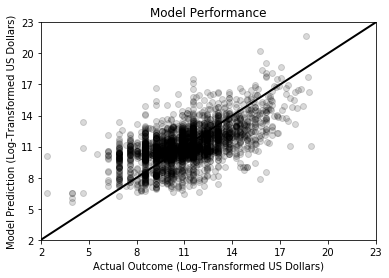

In [90]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [91]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
-1.8037e-01  5.9900e-02  1.8965e-02  1.1797e-01 -6.8347e-02 -3.3051e-01
 1.1896e-01  5.3104e-01  2.2301e-01  2.0866e-01  2.2482e-01 -8.6400e-02
-4.0208e-02 -2.1218e-01 -1.6769e-01 -1.1701e-01  1.4955e-01  2.4536e-01
 5.4376e-02 -5.5360e-01 -2.9682e-02 -1.8899e-01  7.2769e-02  2.7762e-01
 2.7831e-01  8.4988e-02 -3.4262e-01 -6.3154e-02 -1.6394e-01 -6.2528e-01
-7.3513e-02 -2.2258e-02  1.8497e-01  6.2036e-02  4.6995e-01 -2.9895e-01
 3.6983e-02 -1.1559e-01  1.1207e-01 -7.0265e-02 -2.0217e-01  2.2937e-01
-2.4923e-01 -1.5068e-01 -1.0690e-01 -1.4186e-01 -3.1472e-01  1.1402e-01
 1.1704e-01 -1.1456e-01  1.2407e-01  2.5128e-01  1.6606e-01 -3.8827e-01
 1.1729e-01  1.2050e-01 -4.2477e-01 -3.4088e-01 -2.9543e-01  6.2216e-02
 3.5116e-02  2.9661e-01 -9.5856e-02  1.3156e-01  1.3800e-01  5.6264e-02
 1.6932e-01  9.8919e-02 -1.1789e-01 -1.5719e-01  4.1161e-02  2.0716e-01
 3.4208e-01 -2.4456e-01 -2.5778e-01 -1.5855e-01  4.4499e-01  3.6331e-01
 2.3074e-02  4.2632e-02  

In [92]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1547  0.2477  0.2164 -0.2405  0.0694  0.2773  0.0617  0.1197  0.0346  0.0320
-0.0066  0.2377 -0.1662 -0.2886 -0.2160  0.4742  0.3204 -0.1493  0.3098  0.0004
 0.0017 -0.1630  0.1715  0.1969 -0.1656 -0.1929  0.1570  0.0876 -0.3177 -0.3926
 0.1882  0.0441  0.1821  0.1969 -0.2019  0.1133 -0.2716 -0.0344  0.0367  0.1607
 0.1943 -0.1700  0.0921  0.4267 -0.0949 -0.0593  0.0244 -0.2142  0.3187 -0.1578
 0.0077  0.0358 -0.5529 -0.2222 -0.6260  0.0303  0.1384  0.0274  0.3163  0.0131
-0.0903 -0.3575  0.0812  0.0102  0.0742 -0.6195 -0.1517  0.0164 -0.3544  0.2853
-0.0238 -0.3404  0.3146 -0.4899  0.3782  0.0255  0.1910  0.2121 -0.6459 -0.6696
-0.0753  0.1697  0.1004 -0.1959  0.4597  0.2372  0.3458  0.2510 -0.0348 -0.5281
 0.3388  0.1840 -0.2754  0.0328  0.1752  0.3203  0.2534 -0.4360  0.2296  0.1812
 0.0386 -0.2920 -0.0261 -0.0301 -0.0886 -0.0418 -0.3023 -0.8636  0.0377 -0.1606
 0.2237  0.2214  0.0121  0.2425  0.3113  0.2978  0.0237 -0.3493 -0.0206 -0.0013
 

In [93]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1587  0.4115  0.4807 -0.3216  0.0048 -1.0916  0.7298  0.6946  0.3658 -0.2209
-0.1192  0.2201  0.1202  0.0553 -0.2696 -0.2104 -0.1391 -0.1375 -0.1671 -0.2594
 0.3603 -0.0469  0.0250  0.0316  0.3750 -0.5016 -0.1185  0.6723  0.5373  0.1127
-0.0328 -0.0468 -0.1472  0.2951  0.3217  0.3501 -0.5068 -0.2399  0.0455  0.1642
-0.1982  0.0035 -0.4058  0.2653  0.0115  0.7071 -0.4074 -0.6146 -0.5226 -0.3259
 0.5519  0.0865 -0.0543  0.2713  0.2904 -0.1100  0.1199 -0.4979  0.1330  0.1323
-0.9766  0.3050  0.3353  0.0197 -0.3179 -0.4130 -0.4467  0.2672  0.1371 -0.1361
-0.9108 -0.1427 -0.8057  0.1154 -0.2956  1.2530 -0.1522 -0.6613 -0.3900  0.1945
 0.2964  0.4453 -0.1210  0.2737  0.2016 -0.9739 -0.2666 -0.1835  0.1052  0.0541

Columns 10 to 13 
 0.5556 -0.0595 -0.1107 -0.2548
-0.0267 -0.1430 -0.2680 -0.1999
-0.5790 -0.1659  0.3164  0.3483
 0.5412  0.4357  0.1706 -0.4261
-0.3535  0.2600  0.2326 -0.0796
 0.0879  0.0999  0.7245 -0.5423
-0.3086  0.1049  0.1213  0.315

In [94]:
model[(6)].weight

Parameter containing:
-3.3398  0.1060  0.0830 -0.1390 -0.0098  0.3407 -0.5732  0.3959 -0.1200
-1.3721 -0.2124 -0.2936 -0.0030  0.1236  0.2162 -0.3076  0.8901  0.0326
-0.6693  0.2754  0.7903 -0.5209 -0.0360 -0.3189 -1.4790  0.9005  0.2916
-1.2584  0.1593  0.2773  0.0345 -0.3475  0.2767 -0.5310  0.1828  0.0935
-0.8478  0.0885  0.7234 -0.6726 -2.4330  0.0794 -0.7061  0.0465  0.2772
 0.3318  0.0207 -4.8459  0.0124  0.1556  0.0277 -0.1210  0.2531  0.1013
[torch.FloatTensor of size 6x9]

In [95]:
model[(8)].weight

Parameter containing:
-0.8587  0.4888  0.9472  0.2296 -1.6997 -0.3997
 0.2281 -0.5016  1.0235 -0.1765 -0.6806 -0.5846
-0.2403  0.2824  0.2836  0.0854 -5.3648 -0.6198
-0.0507 -0.3826  0.0708 -0.3434 -0.3804  0.3411
[torch.FloatTensor of size 4x6]

In [96]:
model[(10)].weight

Parameter containing:
 1.0983 -0.7202  1.1551 -0.4998
[torch.FloatTensor of size 1x4]

## Round 6: Six-Hidden-Layer Neural Network

In [97]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [98]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [99]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

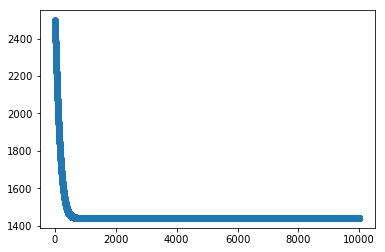

In [100]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

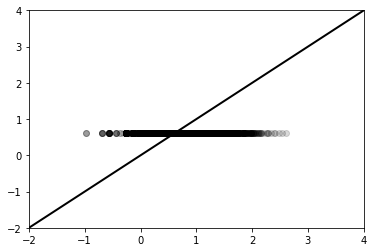

In [102]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [103]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.4232
[torch.FloatTensor of size 1]

In [104]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

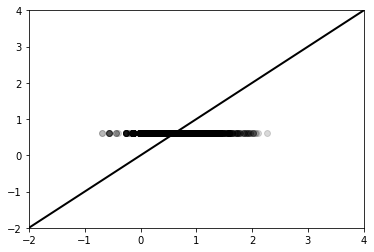

In [105]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [106]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 464.4693
[torch.FloatTensor of size 1]

In [107]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

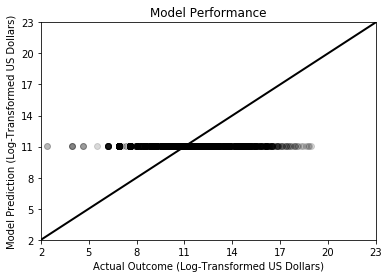

In [108]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [109]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0536 -0.0787  0.1587 -0.0223  0.1086 -0.0758 -0.0474 -0.0027 -0.0577  0.0537
 0.1225  0.0589 -0.1523 -0.1560 -0.0599 -0.0694 -0.1409  0.0772  0.1001  0.1213
 0.0433 -0.1056  0.1286  0.1717 -0.1040 -0.1368  0.1182 -0.1678  0.1078 -0.0654
-0.0843  0.0652 -0.0413 -0.1750  0.0064  0.0805 -0.1562 -0.1263  0.0102 -0.0934
-0.0550  0.0401 -0.0221  0.0965  0.0510  0.1603 -0.0163 -0.0726  0.1716 -0.1013
 0.0484  0.0659  0.1022 -0.0986 -0.1412 -0.0897  0.1422  0.1266  0.1100  0.1641
-0.0541 -0.0518 -0.1569  0.0023 -0.0586  0.0230 -0.0094  0.0368  0.1476  0.1566
 0.0725 -0.0535  0.1210  0.0080  0.1691 -0.0552 -0.0044  0.0919 -0.0303 -0.0702
-0.1308  0.1019 -0.0723  0.0023  0.0817  0.0625  0.0995 -0.0640 -0.0961  0.1285
-0.0364 -0.0710  0.0242  0.1535 -0.1349  0.1522  0.1115 -0.0782  0.1492  0.1076
 0.0010  0.1278 -0.1414 -0.0572 -0.1726 -0.0485 -0.1186  0.0105  0.0966 -0.0679
 0.1155  0.1732  0.1238  0.0175 -0.0171  0.1319 -0.1225 -0.0833  0.0475 -0.0937
-

In [110]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0888  0.0575 -0.1033 -0.1328 -0.1621 -0.1056  0.0291  0.0396  0.0247 -0.1991
 0.1220  0.0666 -0.1869  0.0252  0.0098 -0.1602 -0.0959 -0.1071 -0.1110  0.1655
 0.1915  0.0274  0.1131  0.0503 -0.0476  0.1343 -0.1027 -0.0701 -0.1475  0.0381
-0.0214  0.0643 -0.1505 -0.0024  0.1015 -0.1205  0.0534 -0.2032 -0.0052  0.0087
-0.0808 -0.0034  0.0569  0.1262  0.0350  0.0075  0.0455  0.0559  0.0150  0.1766
 0.1545 -0.0715  0.2021  0.0819 -0.1404 -0.0796 -0.1715  0.0418  0.0721  0.1082
-0.0479  0.0138 -0.0036 -0.2048  0.1402 -0.1355 -0.1389  0.0168 -0.0416  0.0458
-0.2095 -0.1146 -0.0780 -0.0398  0.1392 -0.1865  0.1917  0.2068 -0.0036 -0.0975
 0.1361  0.1900 -0.0404  0.2061 -0.1242  0.0925 -0.0592  0.2062  0.1660  0.1699
 0.2057 -0.0586 -0.2065  0.0244  0.1674 -0.1066  0.1967 -0.2000  0.0313 -0.1013
 0.2044  0.0201 -0.1942  0.2179 -0.1717  0.1371  0.1236 -0.1896  0.1491 -0.0627
-0.0735 -0.1389 -0.2034  0.1923  0.0947 -0.0796  0.2052 -0.1354  0.1728  0.1433
 

In [111]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.0432 -0.1949 -0.2231 -0.1910 -0.1785  0.1439  0.2507 -0.0470  0.0713  0.0926
-0.1618  0.1528  0.2358  0.1510 -0.0979  0.1757 -0.0355  0.0568  0.2042  0.0219
 0.0077 -0.0576 -0.2092  0.1592 -0.1060 -0.2290  0.0484 -0.0832  0.1693 -0.1399
 0.1153 -0.2322 -0.0844 -0.0666 -0.0066 -0.0076  0.0921  0.1173  0.0325  0.1355
-0.0486 -0.2394 -0.2207  0.1331 -0.0924  0.0895  0.2274  0.1228 -0.2212  0.0006
 0.2417 -0.1252  0.1443 -0.0044  0.0099 -0.0754 -0.0181 -0.2554 -0.1173  0.1035
 0.1961 -0.2592 -0.1368 -0.0376  0.1695  0.1543  0.0557 -0.1990  0.2643  0.1005
 0.1876 -0.0659 -0.1085  0.1097 -0.0940 -0.2344 -0.1632 -0.0686 -0.2004  0.1776
 0.1121 -0.2349 -0.2452  0.0641 -0.0034 -0.1390 -0.2372 -0.1978  0.1249 -0.2456

Columns 10 to 13 
 0.0829  0.0521 -0.0798 -0.0255
-0.2124 -0.2461  0.2315 -0.1533
-0.0726 -0.1306  0.2302 -0.0837
-0.2302  0.1131 -0.0324  0.0111
-0.0658 -0.2337 -0.1528 -0.0242
-0.1593  0.2592 -0.1628  0.0694
 0.0543  0.2199 -0.0814 -0.158

In [112]:
model[(6)].weight

Parameter containing:
-0.2706  0.0140 -0.2932 -0.2408  0.2641 -0.1057 -0.1009  0.1462 -0.0325
 0.2275 -0.0382 -0.3021 -0.2866 -0.2462  0.1317 -0.2867  0.1228 -0.0258
-0.2323  0.0955 -0.3233  0.0637  0.0053  0.1642 -0.0971 -0.1962  0.0074
 0.2661  0.3070 -0.1586 -0.1793 -0.0570  0.0267 -0.3128  0.2982  0.0835
-0.1904  0.3051 -0.2517  0.0719  0.2252 -0.2635 -0.3238 -0.1399  0.3129
-0.2328 -0.1666  0.2186  0.1736 -0.2642 -0.0965  0.1919 -0.1199  0.3126
[torch.FloatTensor of size 6x9]

In [113]:
model[(8)].weight

Parameter containing:
-0.0957  0.1134 -0.2185  0.1753  0.2325  0.3458
 0.0068  0.3461  0.2997  0.0186 -0.0054  0.2703
-0.2550  0.2265 -0.1521  0.1272 -0.2345 -0.1307
 0.0755  0.2836 -0.0796 -0.3176 -0.2614  0.0617
[torch.FloatTensor of size 4x6]

In [114]:
model[(10)].weight

Parameter containing:
-0.4659 -0.0041  0.4680 -0.3246
 0.1576  0.1650 -0.4886 -0.4606
-0.2959 -0.3319  0.1584 -0.0595
[torch.FloatTensor of size 3x4]

In [115]:
model[(12)].weight

Parameter containing:
 0.0885  0.0435 -0.4311
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [116]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [117]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [118]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

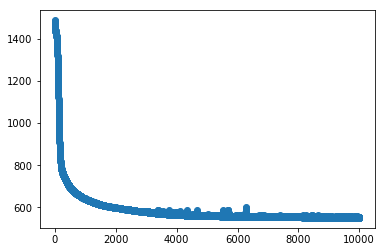

In [119]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [120]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

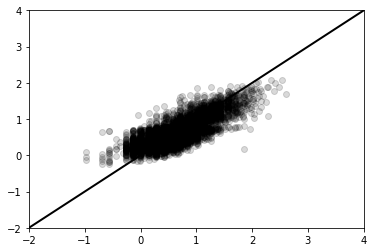

In [121]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [122]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 338.9718
[torch.FloatTensor of size 1]

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

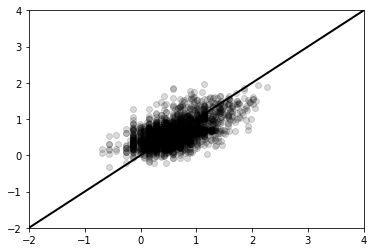

In [124]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [125]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 332.3063
[torch.FloatTensor of size 1]

In [126]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

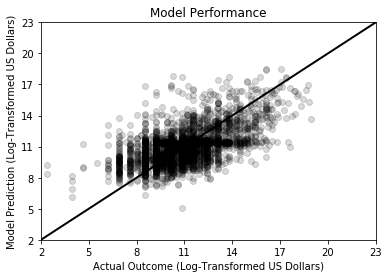

In [127]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [128]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2084  0.2366 -0.1837 -0.1433  0.1000 -0.4115 -0.0637 -0.0469 -0.1571 -0.1435
-0.0712 -0.0179 -0.2554  0.3626  0.4593 -0.1398 -0.1123  0.3239  0.2158 -0.0242
-0.2254 -0.0430  0.0726  0.2318  0.5614 -0.1510  0.1660  0.2386 -0.0764  0.3561
 0.1277 -0.3233  0.1775 -0.0486 -0.0996 -0.1542  0.1946 -0.0518  0.0512  0.0187
 0.2094  0.0223  0.1545  0.3483 -0.1944  0.2424 -0.0863  0.0993 -0.2789  0.2691
 0.0183  0.0506  0.1250 -0.0746 -0.3221 -0.4384  0.1094  0.2153 -0.1281  0.4325
 0.0814  0.1951  0.1394 -0.0489 -0.2871 -0.0050 -0.1491  0.5364  0.2587  0.0081
 0.3035 -0.0541 -0.2303  0.2031  0.3072  0.2798 -0.2185  0.0993 -0.2989 -0.3208
 0.0785  0.2384 -0.0705  0.4208 -0.2585 -0.2154  0.2886  0.1354 -0.1857 -0.2063
 0.2622  0.4055  0.0320  0.2316 -0.0382 -0.1224  0.0271  0.0533 -0.1931  0.1310
 0.0034 -0.1042  0.2842 -0.1039 -0.0272  0.1606  0.2793  0.5003 -0.2735 -0.4069
-0.1000  0.2836  0.1341  0.0378  0.3885 -0.4899  0.0968  0.1030 -0.2309 -0.1607
 

In [129]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0887  0.3023  0.0971  0.2193  0.0724  0.4015 -0.1489 -0.0762  0.0633 -0.2713
-0.0059  0.2841 -0.2622  0.0733  0.3431  0.2497 -0.1006  0.1485  1.0433 -0.5345
 0.1070  0.4613  0.2433 -0.1444  0.0114  0.2938 -0.2747  0.1737  0.3282  0.0564
-0.0552  0.1536 -0.1467  0.1155 -0.1124  0.3755  0.3503 -0.3406  0.2149  0.2094
-0.4581  0.5331 -0.2591 -0.0985  0.4666 -0.2784 -0.6300 -0.0989  0.1130 -0.0826
-0.2304 -0.0342  0.2761  0.3298 -0.7670  0.4644  0.6474 -0.0090  0.0425 -0.0494
 0.4823  0.1191  0.0100  0.1138 -0.1270  0.6106  0.5737  0.2427 -0.2952  0.0563
 0.2176  0.2059 -0.3356  0.0221  0.2071 -0.0928  0.1275 -0.0660 -0.0427 -0.3521
-0.0257  0.0710  0.2228  0.2148 -0.1196  0.1092  0.2748  0.2340  0.1169 -0.3341
 0.4983  0.2717 -0.1893  0.0386  0.4482  0.6233  0.3544 -0.2805  0.5788  0.0326
 0.3838  0.1344 -0.0267  0.1123  0.4569  0.2854 -0.0448 -0.1473  0.0733 -0.5565
 0.3336  0.1581  0.5460 -0.2229 -0.1430 -0.7741 -0.0010  0.5484 -0.3462  0.1936
 

In [130]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1338 -0.7585  0.2304  0.5031 -3.0297  0.4074  0.0841 -0.6079 -0.3927 -0.0161
 0.2450  0.0529  0.2307  0.1217 -0.1268  0.7440 -0.0812 -0.1079 -0.5278  0.0637
-0.4523  0.1949 -0.0542  0.7274 -0.1121 -0.3545  0.1913 -0.2403 -0.2263 -0.5297
-0.1088 -1.2185  0.3144 -0.5450  0.5251 -0.1784 -0.6653 -0.5905 -0.2255 -0.4088
 0.1080  0.0434  0.4696 -0.7545  0.1010 -0.3054  0.3155 -0.2186 -0.7292  0.0572
 0.6884  0.3947  0.3298  0.4842 -0.6793 -0.2718  0.7134  0.3183  0.2077  0.3835
 0.0647 -0.6463  0.2298 -0.1690  0.3940  0.3331  0.3898  0.4757  0.3131 -0.0536
-0.2989  0.2023  0.1985  0.1184  0.2367 -0.2940  0.0546 -0.2720 -0.5755  0.2650
 0.2276  0.2507  0.2902  0.8940 -0.4826  0.7940  0.3507  0.5758  0.3538  0.3765

Columns 10 to 13 
-0.5320 -0.5899  0.0769 -0.2587
 0.0236 -0.0085 -0.2756  0.0209
-0.9656 -0.2355  0.4548 -0.2344
-0.6027  0.3666  0.3899 -0.4218
-0.2050 -0.6039  0.1058 -0.0665
 0.6435 -0.2640 -0.0971  0.3616
 0.4611 -0.3817  0.1422  0.432

In [131]:
model[(6)].weight

Parameter containing:
-2.6258  0.7260  2.4942  0.8547  1.6386 -0.0082  0.9822  0.2497 -0.0309
-0.5710  0.5176 -0.4361  0.0556  0.4678  0.2531  0.4040  0.6184 -0.5241
 0.5427  1.3709  0.3713  0.4722  0.6654 -0.5246 -0.5554 -0.0900 -0.4320
 2.2622 -0.9961 -3.1278 -0.1411 -0.8643  0.4174 -0.4276 -0.5964 -0.0498
 0.5208  0.9695 -4.6035  0.3088  0.4079 -0.3252 -0.3058  0.0652 -0.3263
 0.3223  1.5716  0.9453  0.4842  0.6707 -0.5042 -0.4645 -0.1447 -0.5316
[torch.FloatTensor of size 6x9]

In [132]:
model[(8)].weight

Parameter containing:
 0.2214 -0.4745  0.3776 -0.5667  0.6039  1.0917
 0.3986  0.5450 -0.0992 -0.0863 -0.5595 -0.4521
-0.3610  0.2378 -0.1376 -0.0064  0.3725 -0.1655
-0.0430  1.0246  1.5910 -0.2500  1.8790  1.3590
[torch.FloatTensor of size 4x6]

In [133]:
model[(10)].weight

Parameter containing:
-0.4407  0.4251  0.3219 -1.7161
 0.2559  0.1632 -0.1109 -1.4091
 0.2875 -0.2042 -0.4281  0.7851
[torch.FloatTensor of size 3x4]

In [134]:
model[(12)].weight

Parameter containing:
-0.7721  1.4557  0.0967
 1.0828 -0.2027 -0.7171
[torch.FloatTensor of size 2x3]

In [135]:
model[(14)].weight

Parameter containing:
 0.7074 -1.0984
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [136]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [137]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(32, 1))

In [138]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

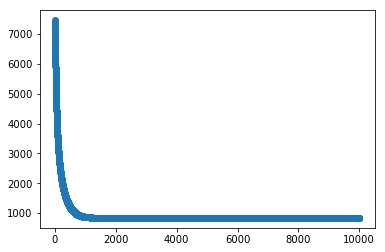

In [139]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [140]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

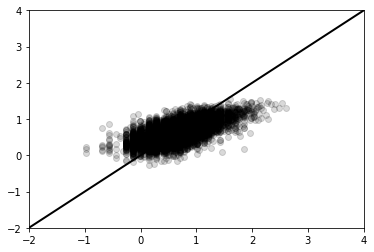

In [141]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [142]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 282.1926
[torch.FloatTensor of size 1]

In [143]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

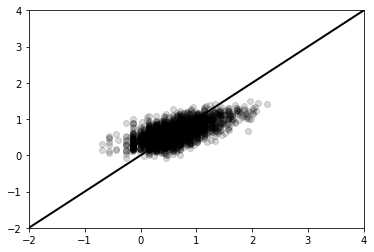

In [144]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.2: Test Set Performance

In [145]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 274.8015
[torch.FloatTensor of size 1]

In [146]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

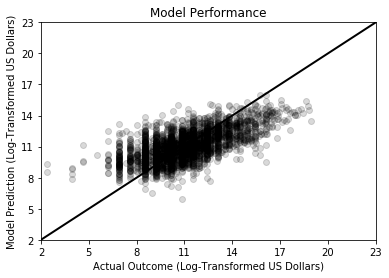

In [147]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [148]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0040  0.0156  0.0068  0.1539  0.1768 -0.0256 -0.0019 -0.0290  0.0351 -0.0208

Columns 10 to 19 
 0.0282 -0.0223  0.0184 -0.0214 -0.0034  0.0019 -0.0012  0.0164 -0.0054  0.0033

Columns 20 to 29 
 0.0082  0.0159  0.0612  0.0742  0.0139 -0.0025 -0.0836 -0.0076  0.0077  0.0370

Columns 30 to 31 
 0.0130 -0.0028
[torch.FloatTensor of size 1x32]